In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customers.csv')
df = df.drop('Var_1', axis=1)
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 184.8+ KB


In [4]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


# Preprocessing

In [5]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
dtype: int64

In [6]:
df = df.dropna(subset=['Work_Experience', 'Ever_Married', 
                       'Graduated', 'Profession'])

In [7]:
df['Family_Size'] = df['Family_Size'].fillna(np.mean(df['Family_Size']))

In [8]:
df['Family_Size'].value_counts()

Family_Size
2.000000    659
1.000000    441
3.000000    400
4.000000    383
5.000000    173
2.839302     88
6.000000     70
7.000000     24
9.000000     16
8.000000     12
Name: count, dtype: int64

In [9]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

Убрали отсутствующие значения

In [10]:
from sklearn.preprocessing import OrdinalEncoder

In [11]:
encoder = OrdinalEncoder()

In [12]:
df = pd.DataFrame(encoder.fit_transform(df), columns=df.columns)

In [13]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,0.0,0.0,1.0,16.0,1.0,2.0,0.0,2.0,0.0
1,1.0,1.0,1.0,17.0,1.0,5.0,8.0,0.0,4.0
2,2.0,1.0,1.0,37.0,0.0,4.0,11.0,1.0,1.0
3,3.0,1.0,1.0,26.0,1.0,1.0,0.0,1.0,5.0
4,4.0,1.0,1.0,39.0,1.0,1.0,5.0,2.0,3.0


Привели все колонки к числовым значениям

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
df = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [17]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,-1.731287,-1.093497,0.839667,-0.463231,0.782090,-0.296043,-0.762499,0.730344,-1.190558
1,-1.729758,0.914497,0.839667,-0.397892,0.782090,0.873336,1.617832,-1.635574,0.861004
2,-1.728229,0.914497,0.839667,0.908903,-1.278626,0.483543,2.510456,-0.452615,-0.677667
3,-1.726700,0.914497,0.839667,0.190166,0.782090,-0.685836,-0.762499,-0.452615,1.373895
4,-1.725172,0.914497,0.839667,1.039582,0.782090,-0.685836,0.725208,0.730344,0.348114


Провели нормализацию данных

In [18]:
from sklearn.decomposition import PCA

In [19]:
pca = PCA(n_components=4)
X = pca.fit_transform(df)

Использовали метод главных компонент для снижения размерности

Были удалены отстутствующие значения в колонках 'Work_Experience', 'Ever_Married', 'Graduated', 'Profession'. Отсутствующие значения колонки 'Family_Size' были заменены на среднее значение колонки. После все значения колонок были приведены к числовым. Была сделана нормальзация данных и был использован метод главных компонент для снижения размерности.

# Clustering

KMeans

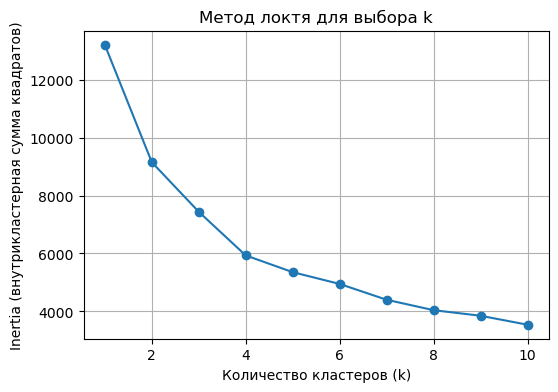

In [20]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_predict(X)
    inertias.append(kmeans.inertia_)

# Визуализация локтя
plt.figure(figsize=(6, 4))
plt.plot(k_range, inertias, marker='o')
plt.xlabel('Количество кластеров (k)')
plt.ylabel('Inertia (внутрикластерная сумма квадратов)')
plt.title('Метод локтя для выбора k')
plt.grid(True)
plt.show()

На основании метода локтя было решено использовать 4 кластера.

In [21]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit_predict(X)

array([1, 2, 0, ..., 1, 2, 1], dtype=int32)

In [22]:
labels = kmeans.labels_
centers = kmeans.cluster_centers_

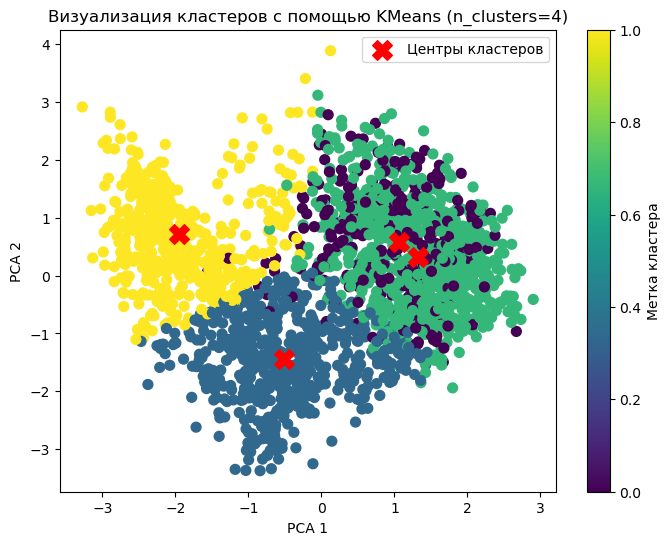

In [23]:
plt.figure(figsize=(8, 6))

# Отображаем данные для каждого кластера разным цветом
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

# Отображаем центры кластеров
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='X', s=200, label="Центры кластеров")

# Добавляем подписи и легенду
plt.title("Визуализация кластеров с помощью KMeans (n_clusters=4)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Метка кластера")
plt.legend()

plt.show()

In [24]:
from sklearn.metrics import silhouette_score

In [25]:
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.30154890705748


По результатам использлования метода k_means видим, что итоговая оценка равна 0.3, не идеально, но пытается разделять на кластеры.

SpectralClustering

In [26]:
from sklearn.cluster import SpectralClustering

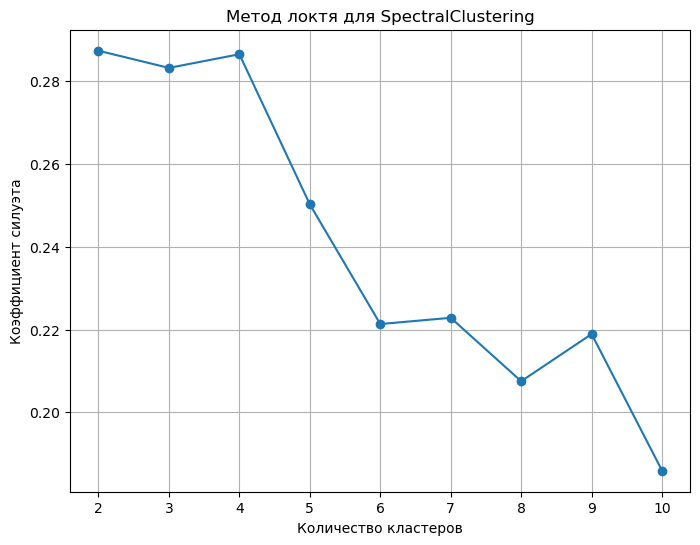

Оптимальное количество кластеров: 2


In [27]:
silhouette_scores = []

# Тестирование разных значений числа кластеров
range_n_clusters = range(2, 11)  # Пробуем от 2 до 10 кластеров
for n_clusters in range_n_clusters:
    # Применение SpectralClustering
    spectral = SpectralClustering(n_clusters=n_clusters, affinity='nearest_neighbors', random_state=42)
    labels = spectral.fit_predict(X)
    
    # Вычисление коэффициента силуэта
    silhouette_avg = silhouette_score(X, labels)
    silhouette_scores.append(silhouette_avg)

# Построение графика
plt.figure(figsize=(8, 6))
plt.plot(range_n_clusters, silhouette_scores, marker='o')
plt.title("Метод локтя для SpectralClustering")
plt.xlabel("Количество кластеров")
plt.ylabel("Коэффициент силуэта")
plt.xticks(range_n_clusters)
plt.grid(True)
plt.show()

# Найдем количество кластеров с наибольшим коэффициентом силуэта
optimal_n_clusters = range_n_clusters[np.argmax(silhouette_scores)]
print("Оптимальное количество кластеров:", optimal_n_clusters)

Опираясь на метод локтя, было решено использовать 2 кластера.

In [28]:
spectral = SpectralClustering(n_clusters=2, affinity='nearest_neighbors')
labels = spectral.fit_predict(X)

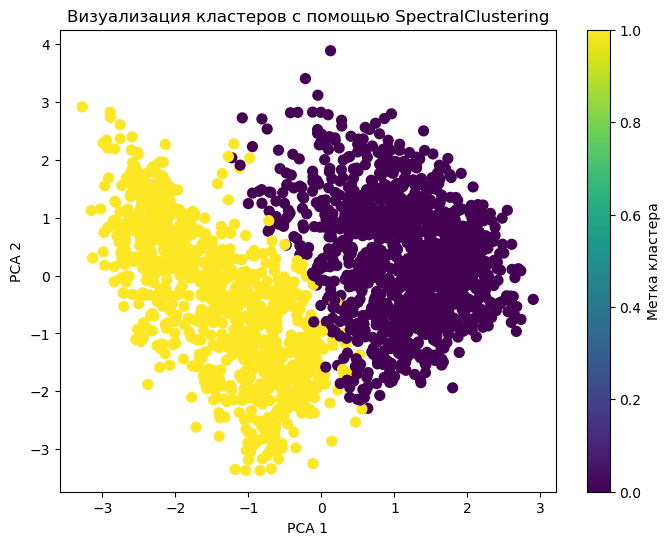

In [29]:
plt.figure(figsize=(8, 6))

# Отображаем данные для каждого кластера разным цветом
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

plt.title("Визуализация кластеров с помощью SpectralClustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Метка кластера")

plt.show()

In [30]:
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.2874072429882813


По реузлаьтатм видно, что качество получилось чуть хуже, чем у KMeans.

Birch

In [31]:
from sklearn.cluster import Birch

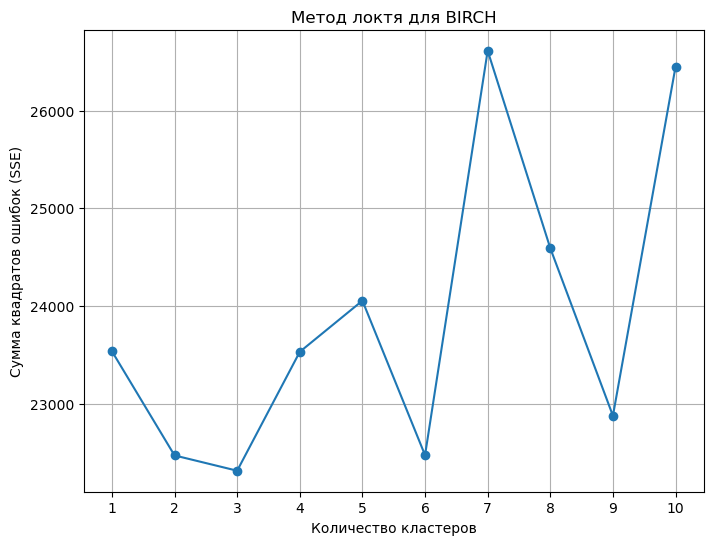

In [32]:
sse = []

# Попробуем разные значения n_clusters от 1 до 10
for n in range(1, 11):
    # Создаем и обучаем модель BIRCH с n кластерами
    birch = Birch(n_clusters=n)
    birch.fit(X)
    
    # Получаем метки кластеров
    labels = birch.predict(X)
    
    # Находим центры кластеров (их можно взять из cluster_centers_)
    centers = birch.subcluster_centers_
    
    # Рассчитываем сумму квадратов ошибок (SSE)
    sse_value = 0
    for i in range(n):
        # Находим все точки, которые принадлежат текущему кластеру
        cluster_points = X[labels == i]
        # Вычисляем расстояния между точками и центром кластера
        distances = np.linalg.norm(cluster_points - centers[i], axis=1)
        # Добавляем сумму квадратов расстояний
        sse_value += np.sum(distances ** 2)
    
    # Добавляем в список SSE для текущего числа кластеров
    sse.append(sse_value)

# Строим график метода локтя
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), sse, marker='o')
plt.title("Метод локтя для BIRCH")
plt.xlabel("Количество кластеров")
plt.ylabel("Сумма квадратов ошибок (SSE)")
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

Метод локтя показал, что оптимальное количество кластеров - 3.

In [33]:
birch = Birch(n_clusters=3)
labels = birch.fit_predict(X)

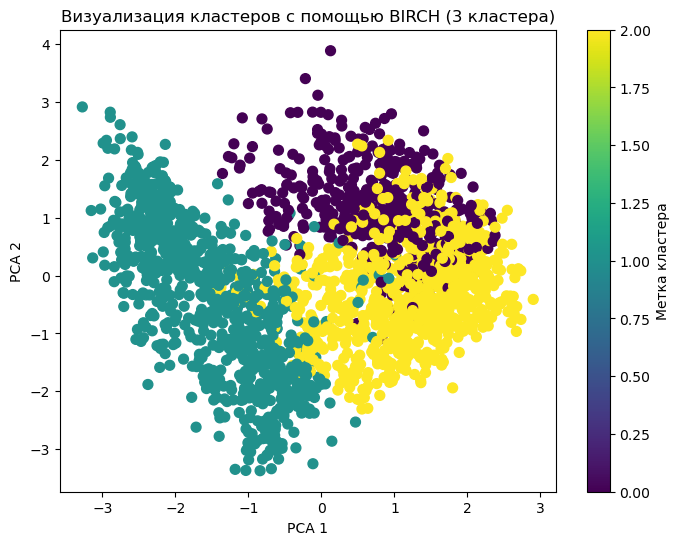

In [34]:
plt.figure(figsize=(8, 6))

# Отображаем данные для каждого кластера разным цветом
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', s=50)

# Добавляем подписи и легенду
plt.title("Визуализация кластеров с помощью BIRCH (3 кластера)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label="Метка кластера")

plt.show()

In [35]:
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.21384049030009233


По результатам видно, что Birch показал самый плохой результат.

# Вывод

Был использован датасет с покупателями, была сделана предобработка данных, а именно: была проведена работа с отствующими значения, была снижена размерность с помощью метода главных компонент. После чего была проведена работа с алкгоритмами кластеризации. Количество кластеров подбиралось на основе метода локтя. Все модели показали неидельный результат. Лучше всего справилися KMean, а хуже всего Birch.